1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [1]:
def conv(num, repr):
    s_num = str(num)

    if repr == "bin":
        bin = num

        #Bin to dec
        dec = 0
        for i in range(1, len(s_num)):
            dec += int(s_num[i])*2**i
        dec *= (-1)**int(s_num[0])

        #Bin to exa
        
        
        

    return dec


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
word = "01010100101000010101010010101010"
len(word)

32

In [4]:
w = "00000011111000000000000000000000"
len(w)

32

In [5]:
def word_to_float(word):
    assert len(word) == 32
    bias = 127
    s = int(word[0])
    e = 0
    for i in range(0, 8, 1):
        exp_bits = word[1:9]
        e += int(exp_bits[7-i])*2**i
    f = 1
    for i in range(1, 24):
        f += 2**(-i)*int(word[8+i])
    
    print(s, f, e)

    return (-1)**s*f*2**(e-bias)
    

In [6]:
word_to_float(w)

0 1.75 7


1.316553672920962e-36

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [7]:
import sys

over = 1
under = 1

while under / 2 > 0:
    under /= 2

while over < sys.float_info.max:
    over *= 2

print(under)
print(over)

5e-324
179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [14]:
eps = 1
var1 = 1

while(var1 < var1+eps):
    eps /= 2

print(eps)

1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [25]:
def quadratic_formula(a, b, c):
    #A
    x1 = (-b+(b**2-4*a*c)**0.5)/(2*a)
    x2 = (-b-(b**2-4*a*c)**0.5/(2*a))
    print("a:", x1, x2)

    #B
    x1 = 2*c/(-b + (b**2-4*a*c)**0.5)
    x2 = 2*c / (-b - (b**2-4*a*c)**0.5)
    print("b:", x1, x2)

    #C
    if b > 0:
        x1 = (-b-(b**2-4*a*c)**0.5)/(2*a)
        x2 = (2*c) / (-b - (b**2-4*a*c)**0.5)
    else:
        x1 = 2*c/(-b + (b**2-4*a*c)**0.5)
        x2 = (-b+(b**2-4*a*c)**0.5/(2*a))
    print("c", x1, x2)


quadratic_formula(0.001, 1000, 0.001)

a: -9.999894245993346e-07 -500999.999999
b: -1000010.5755125057 -1.000000000001e-06
c -999999.999999 -1.000000000001e-06


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [69]:
f = lambda x: x*(x-1)
df = lambda f, x, delta: (f(x+delta)-f(x))/delta

#A
delta = 10**-2
x = 1
print(df(f, x, delta))

#B
deltas = [10**-2, 10**-4, 10**-6, 10**-8, 10**-12, 10**-14]
acc = [abs(1-df(f, x, delta)) for delta in deltas]
print(acc)

1.010000000000001
[0.010000000000000897, 9.999999988985486e-05, 9.99917733279787e-07, 3.922528746258536e-09, 8.890058334132256e-05, 0.0007992778373491216]


Text(0, 0.5, 'Acc')

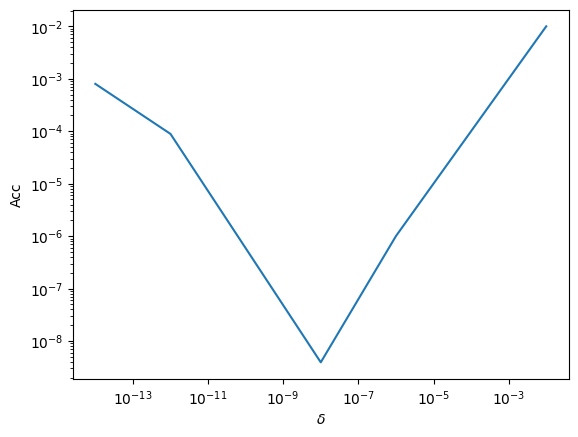

In [70]:
import matplotlib.pyplot as plt
plt.loglog()
plt.plot(deltas, acc)
plt.xlabel(r"$\delta$")
plt.ylabel("Acc")

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [62]:
from math import pi

f = lambda x: (1-x**2)**0.5
N = 100
h = 2/N

#A
x_range = [i*h -1 for i in range(N+1)]

def integrate(f, N):
    x_range = [i*h -1 for i in range(N+1)]
    integral = sum([f(x)*2/N for x in x_range])
    return integral
integral = integrate(f, N)
print(integral - pi/2)

#B
import time as tm
N_range = []
times = []
acc = []

while True:
    # Time
    start = tm.time()
    integral = integrate(f, N)
    stop = tm.time()

    #Results 
    times.append(stop-start)
    N_range.append(N)
    acc.append(abs(integral - pi/2))
    N *= 2

    #Break
    if stop-start > 60: #s
        break

-0.0016620712456461018


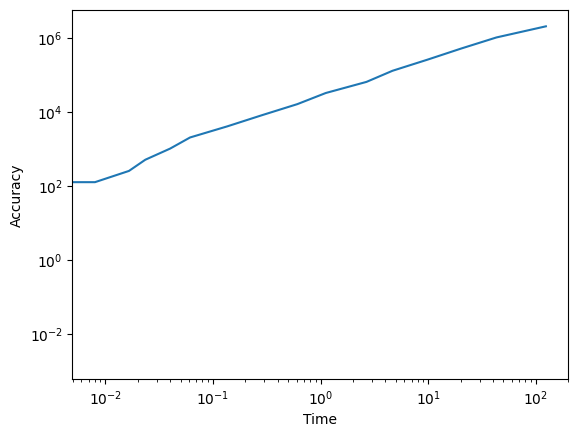

In [64]:
import matplotlib.pyplot as plt
plt.loglog()
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.plot(times, acc)

In [71]:
print(N_range[-1])

104857600
